## Read HSAF Data

Define the directories:
see `DATA_MANAGE.ipynb` for more info reg data directories

Contents:

### 1. HSAF Raw Data (`HSAF_OR`)

### 2. HSAF Preprocessed Data (`HSAF_DUMP` and `HSAF_PP`)

#### 2.1 Plot the Cropped (`cdo sellonlat`) HSAF Data

#### 2.2 Find the Indices for `cdo selindex`

To find indices for reducing the size of the files before remapping them. The result out of this section is potentially used in `HSAF_PP.ipynb` step 1.

#### 2.3 Read `.cr` Data

cropped, appended, and renamed data according to `HSAF_PP.ipynb`

#### 2.4 Sanity Check for `HSAF_PP`

- Check for NA values; to see whether the NA values match between the original data and the preprocessed data.
- Check for correct coordinates; to see whether or not the time-series from two datapoints between the original and preprocessed data match.
- Check for date match; the original data doesn't have date attributes in the netcdf file, and it was manually added during the preprocessing, therefore it needs to be checked.

### 3. HSAF Regridded Data

Read the regridded hsaf file in `HSAF_RG`

#### 3.1. Regrid Using `gdal` Metadata

Use `gdal_translate` to translate the projection str into coordinates.

and use `gdalwrap` translate to lon/lat coordinates.

#### 3.2. Regrid Using `HSAF_UTI` Files

Use `ncks` to append `lat_lon_0.nc` file with the hsaf data.

#### 3.3. Compare hsaf .png file with 3.1 and 3.2

Use the png file from ftphsaf.meteoam.it to validate the regridding option.

#### 3.4. Compare various regridding methods

##### 3.4.1 Daily

##### 3.4.2 Monthly

### 1. HSAF Raw Data (`HSAF_RET`)


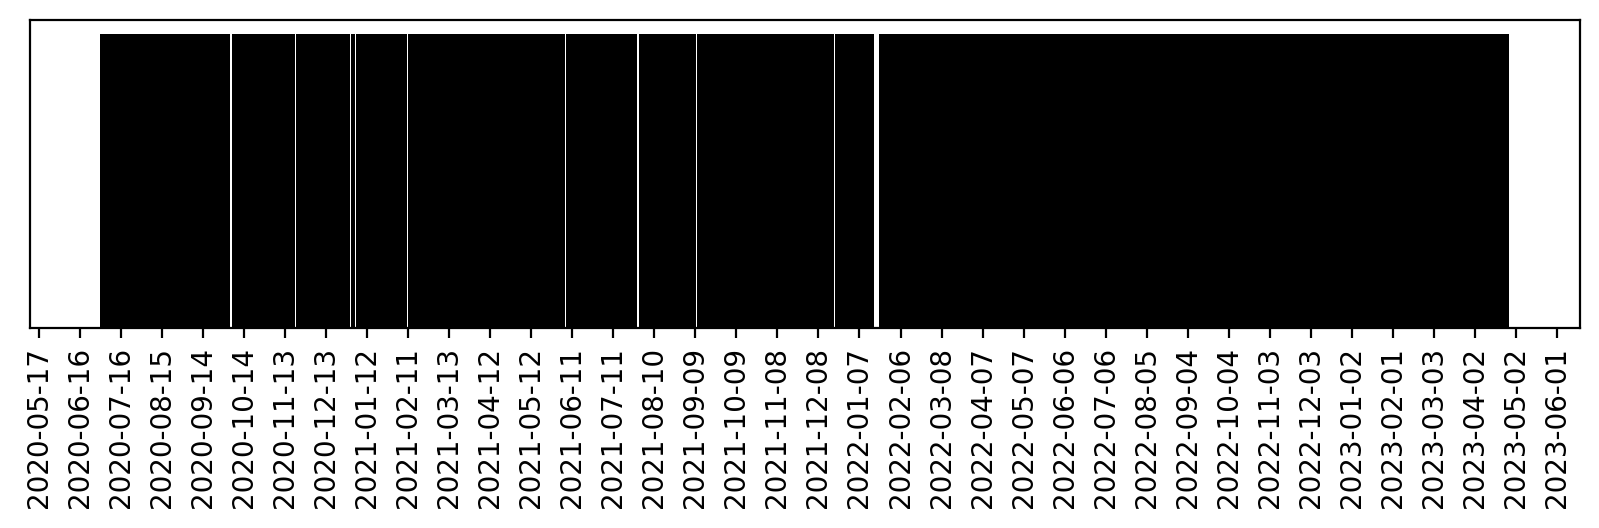

,Start Date,End Date
0,2020-07-06 08:00:00,2020-07-06 10:00:00
1,2020-08-31 10:00:00,2020-08-31 13:00:00
2,2020-10-04 03:00:00,2020-10-04 05:00:00
3,2020-10-04 05:00:00,2020-10-05 00:00:00
4,2020-11-20 12:00:00,2020-11-21 00:00:00
5,2020-12-30 15:00:00,2020-12-31 00:00:00
6,2021-01-03 06:00:00,2021-01-03 08:00:00
7,2021-01-03 12:00:00,2021-01-03 22:00:00
8,2021-01-10 22:00:00,2021-01-11 01:00:00
9,2021-02-10 10:00:00,2021-02-10 12:00:00


In [7]:
from py_env_hpc import *
dateformat="%Y%m%d_%H"
date_digit_start=4
date_digit_end=15

# Generate the datelist and data availability plots.
datelist = Func.datelist_generator(HSAF_OR, dateformat, date_digit_start, date_digit_end)
Func.availability_plot(datelist, 10, 2, 30)
data_gaps = Func.find_data_gaps(datelist)
data_gaps

In [9]:
# glimpse into the data in HSAF_OR
file1=sorted(os.listdir(HSAF_OR))[0]
data = xr.open_dataset(HSAF_OR+"/"+file1)
print(file1)
data

h61_20200701_0000_01_fdk.nc


<xarray.Dataset>
Dimensions:  (x: 3712, y: 3712)
Dimensions without coordinates: x, y
Data variables:
    acc_rr   (x, y) float32 ...
    qind     (x, y) float32 ...
Attributes: (12/14)
    hsaf61_algorithm_version:  1.0
    parallax_correction:       Mode on
    sub-satellite_longitude:   0.0f
    satellite_altitude:        35785832
    satellite_altitude_unit:   m
    r_eq:                      6378.168945
    ...                        ...
    r_pol_unit:                Km
    cgms_projection:           +proj=geos +coff=1857.000000 +cfac=13642337.00...
    gdal_projection:           +proj=geos +a=6378169.000000 +b=6356584.000000...
    accumulation_time:         01
    accumulation_time_unit:    hours
    end_of_accumulation_time:  20200701T00:00Z

In [6]:
# read the satellite gdal_projection for all files
#files=sorted(os.listdir(HSAF_OR))
#for file in files:
    #data = xarray.open_dataset(HSAF_OR+"/"+file)
    #print(data.attrs["gdal_projection"])
print("conclusion: satellite altitude is always +proj=geos +a=6378169.000000 +b=6356584.000000 +lon_0=0.000000 +h=35785832.000000 +sweep=y")

conclusion: satellite altitude is always +proj=geos +a=6378169.000000 +b=6356584.000000 +lon_0=0.000000 +h=35785832.000000 +sweep=y


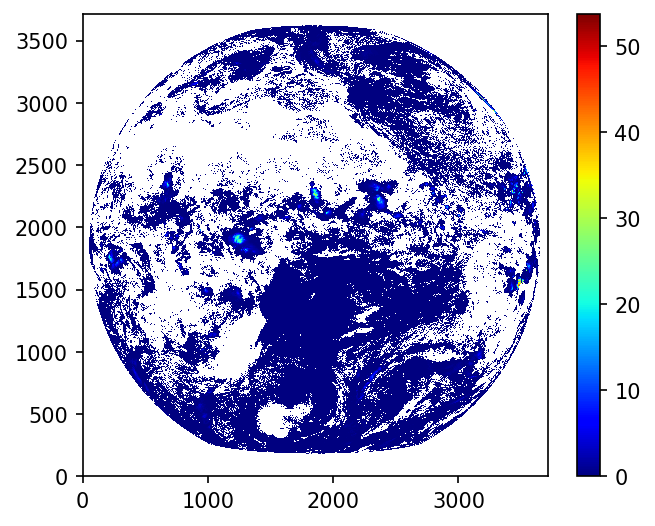

In [54]:
# plot the data map for acc_rr

pl.figure(figsize=(5, 4), dpi=150)
pl.pcolormesh(data["acc_rr"], cmap="jet")
pl.colorbar()

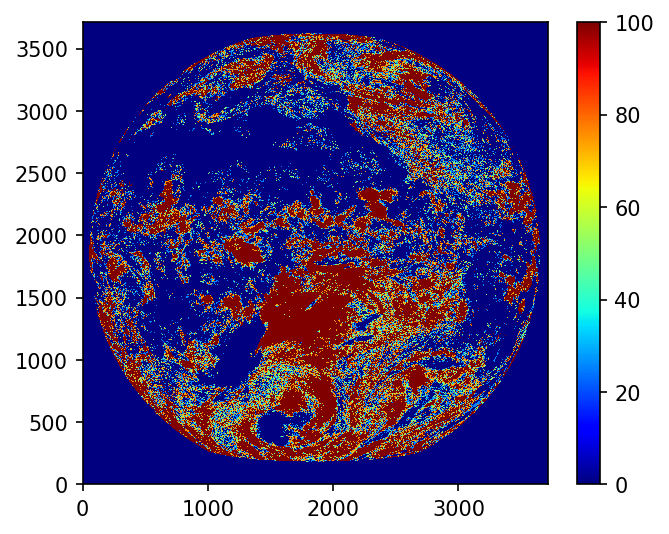

In [8]:
# plot the data map for qind

pl.figure(figsize=(5, 4), dpi=150)
pl.pcolormesh(data["qind"], cmap="jet")
pl.colorbar()

In [ ]:
#qind amd pr
# Plot hsaf full disc data for 200 time steps.
# import libraries and directories
from py_env_hpc import *

files=sorted(os.listdir(HSAF_OR))[:100]

full_disc_mapper(HSAF_OR, files, "hsaf_raw", "qind", 180, 11.25, 9, 
                "rainbow", 5, 100, HSAF_PLOT+"/HSAF_qind_fulldisc")

full_disc_mapper (HSAF_OR, files, "hsaf_raw", "acc_rr", 180, 11.25, 9, 
                "rainbow", 10, 4, HSAF_PLOT+"/HSAF_pr_fulldisc/")

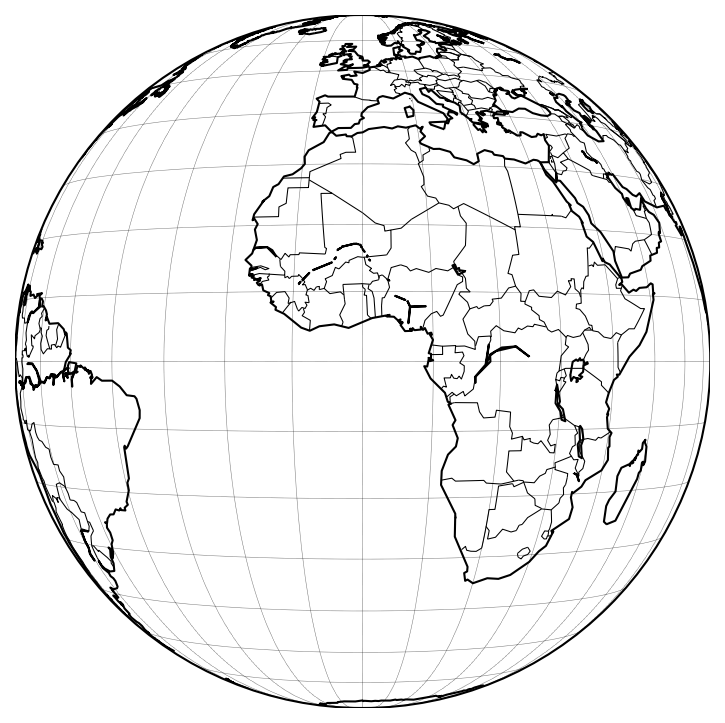

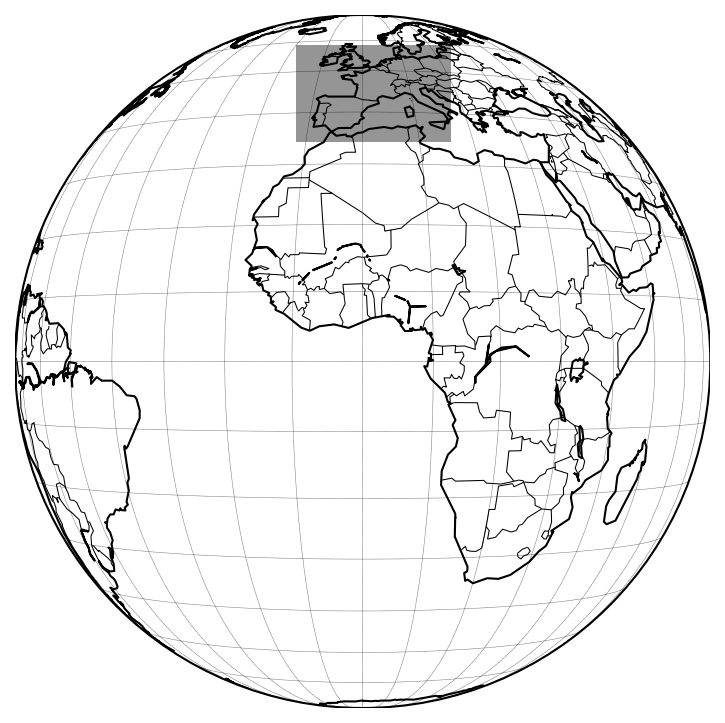

In [5]:
# HSAF FULL DISC AND CROPPED GRIDS:
from py_env_hpc import *
latlon=xarray.open_dataset(HSAF_UTI+"/"+"lat_lon_0.nc")

pl.figure(figsize=(6, 6), dpi=150)
m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
m.drawcoastlines()
m.drawparallels(np.arange(-60., 67.5, 10), linewidth=0.25)
m.drawmeridians(np.arange(-80., 80., 10), linewidth=0.25)
m.drawcountries()
pl.show()

pl.figure(figsize=(6, 6), dpi=150)
m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
m.drawcoastlines()
m.drawparallels(np.arange(-60., 67.5, 10), linewidth=0.25)
m.drawmeridians(np.arange(-80., 80., 10), linewidth=0.25)
m.drawcountries()

pr=m.contourf(latlon["long"][3000:3500, 1400:2200], latlon["latg"][3000:3500, 1400:2200], latlon["long"][3000:3500, 1400:2200]*0, vmax=0, latlon=True, cmap="Greys")
pl.show()

pl.figure(figsize=(6, 6), dpi=150)
m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
m.drawcoastlines()
m.drawparallels(np.arange(-60., 67.5, 10), linewidth=0.25)
m.drawmeridians(np.arange(-80., 80., 10), linewidth=0.25)
m.drawcountries()

# Plot HRES-PP data on Plate Carree 
#from py_env_hpc import *

nc_mapper_3d (HSAF_PP, ["HSAF_PP_OCT_2020_2021.cr.nc"], "pr", "lon", "lat", np.arange(1), 140, 7.5, 5, ccrs.PlateCarree(), True, "Plate Carree", "Greys", 4, 0, HSAF_PLOT+"/HSAF_GRID/")

### 2. HSAF Preprocessed Data (`HSAF_DUMP`)


#### 2.1 Plot the Cropped (`cdo sellonlat`) HSAF Data


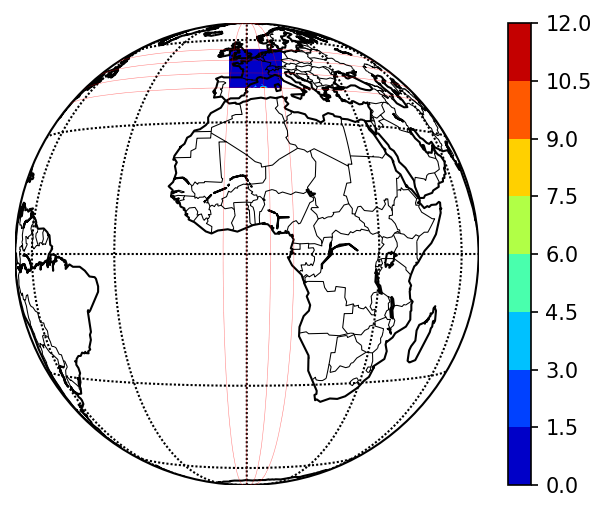

In [56]:
# plot the cropped data on geo projection (h61_20221011_2300_01_fdk_renamed_setatt_cropped)

data = xarray.open_dataset(EXA_DIR+"/"+"h61_20221011_2300_01_fdk_renamed_setatt_cropped.nc")
lat = data['lat']
lon = data['lon']
precip=data["pr"]

pl.figure(figsize=(5, 4), dpi=150)

m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
#m = Basemap(projection='ortho', lat_0=50, lon_0=0, resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(-90., 90.+5., 30.), color='black', linewidth=1)
m.drawmeridians(np.arange(-90., 90.+5., 30.), color='black', linewidth=1)
m.drawparallels(np.arange(40., 55.+5., 5.), color='r', linewidth=0.25)
m.drawmeridians(np.arange(-5., 10.+5., 5.), color='r', linewidth=0.25)
m.drawcountries()
pr=m.contourf(lon, lat, precip, latlon=True, cmap="jet")
pl.colorbar()

#### 2.2 Find the Indices for `cdo selindex`


In [ ]:
# plot h61_20221011_2300_01_fdk 
# find the best indices for precropping using cdo selindexbox

data = xarray.open_dataset(EXA_DIR+"/"+"h61_20221011_2300_01_fdk.nc")
latlon=xarray.open_dataset(HSAF_UTI+"/"+"lat_lon_0.nc")
lat = latlon.variables['latg']
lon = latlon.variables['long']
precip=data["acc_rr"]

pl.figure(figsize=(5, 4), dpi=150)

m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
#m = Basemap(projection='ortho', lat_0=50, lon_0=0, resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(35., 60., 5.))
m.drawmeridians(np.arange(-10., 20., 5.))
m.drawcountries()
pr=m.contourf(lon[3000:3500, 1400:2200], lat[3000:3500, 1400:2200], precip[3000:3500, 1400:2200], latlon=True, cmap="jet")
pl.colorbar()
print("conclusion: the best indices are 3000:3500 and 1400:2200")

#### 2.3 Read `.cr` Data


h61_20201002_0500_01_fdk.nc.cr.nc


/tmp/ipykernel_2070/1457554020.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pr=m.pcolormesh(lon[0], lat[0], precip[0], latlon=True, cmap="jet")


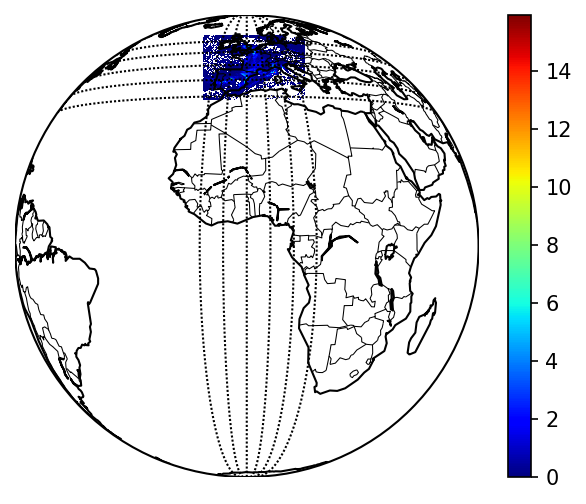

/tmp/ipykernel_2070/1457554020.py:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pr=m.pcolormesh(lon[0], lat[0], precip[0], latlon=True, cmap="jet")


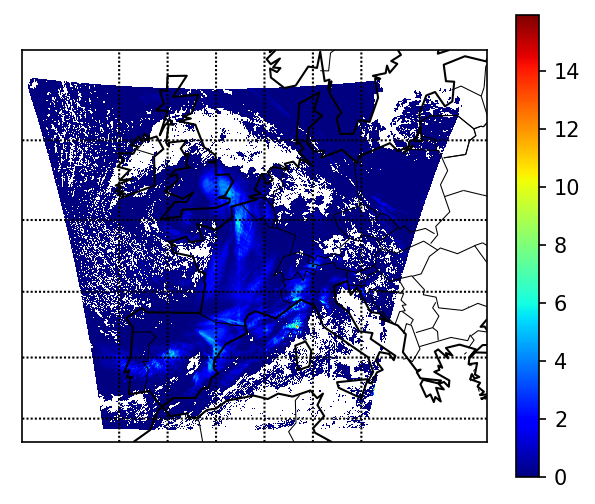

<xarray.Dataset>
Dimensions:  (time: 1, x: 501, y: 801)
Coordinates:
  * time     (time) datetime64[ns] 2020-10-02T05:00:00
    lat      (time, x, y) float64 ...
    lon      (time, x, y) float64 ...
Dimensions without coordinates: x, y
Data variables:
    pr       (time, x, y) float32 ...
    qind     (time, x, y) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [4]:
# glimpse into one of the .cr files in HSAF_DUMP (h61_20201001_0000_01_fdk.nc.cr.nc)

files=sorted(os.listdir(HSAF_DUMP))

data = xarray.open_dataset(HSAF_DUMP+"/"+files[len(files)-2])
print(files[len(files)-2])

lat = data['lat']
lon = data['lon']
precip=data["pr"]
qind=data["qind"]

pl.figure(figsize=(5, 4), dpi=150)
m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
#m = Basemap(projection='ortho', lat_0=50, lon_0=0, resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(35., 60., 5.))
m.drawmeridians(np.arange(-10., 20., 5.))
m.drawcountries()
pr=m.pcolormesh(lon[0], lat[0], precip[0], latlon=True, cmap="jet")
pl.colorbar()
pl.show()

pl.figure(figsize=(5, 4), dpi=150)
m = Basemap(projection='merc', resolution='c', llcrnrlat=33, urcrnrlat=60, llcrnrlon=-20, urcrnrlon=28)
#m = Basemap(projection='ortho', lat_0=50, lon_0=0, resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(35., 60., 5.))
m.drawmeridians(np.arange(-10., 20., 5.))
m.drawcountries()
pr=m.pcolormesh(lon[0], lat[0], precip[0], latlon=True, cmap="jet")
pl.colorbar()
pl.show()
data

In [10]:
# read the merged file HSAF_PP_OCT_2020_2021.cr.nc
data = xarray.open_dataset(HSAF_DUMP+"/"+"HSAF_PP_OCT_2020_2021.cr.nc")
data

<xarray.Dataset>
Dimensions:  (time: 8668, x: 501, y: 801)
Coordinates:
  * time     (time) datetime64[ns] 2020-10-01 ... 2021-09-30T23:00:00
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
Dimensions without coordinates: x, y
Data variables:
    pr       (time, x, y) float32 ...
    qind     (time, x, y) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

#### 2.4 Sanity Check for `HSAF_PP`


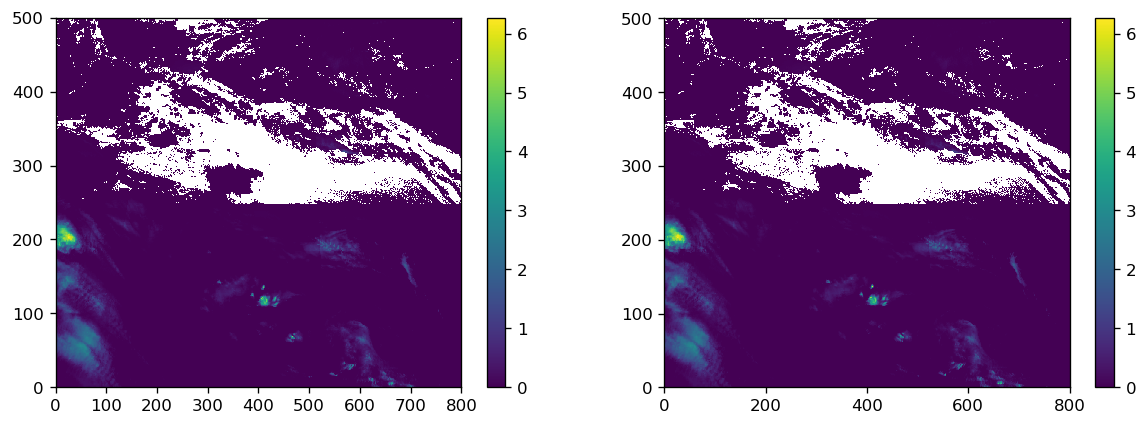

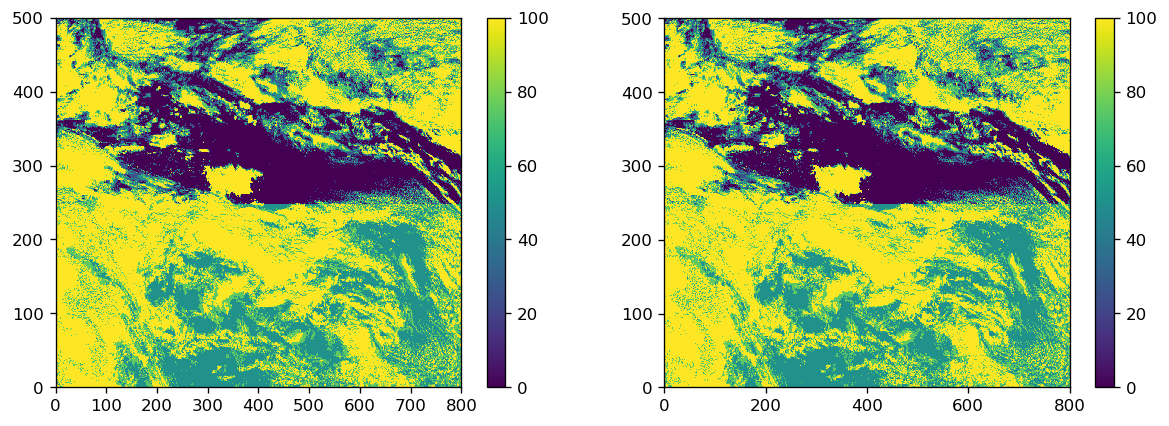

Conclusion: the NA values match; the dates match; the coordinates match


In [16]:
# import libraries and directories
from py_env_hpc import *
# - Check for NA values; to see whether the NA values match between the original data and the preprocessed data.
# - Check for date match; the original data doesn't have date attributes in the netcdf file, and it was manually added during the preprocessing, therefore it needs to be checked.
# - Check for correct coordinates; to see whether or not the time-series from two datapoints between the original and preprocessed data match.

# let's plot a map for a random date, e.g., 2021011015.
ori_file=HSAF_OR+"/h61_20210110_1500_01_fdk.nc"
HSAF_PP_f=HSAF_PP+"/HSAF_PP_OCT_2020_2021.cr.nc"
lat_lon_or=HSAF_UTI+"/lat_lon_0.nc"

# Open both using xarray (the lat/lon information doesn't come with the original data, need to load that one, too)
dt_or=xarray.open_dataset(ori_file)
dt_pp=xarray.open_dataset(HSAF_PP_f)
ll_or=xarray.open_dataset(lat_lon_or)

# dt_or is associated with the selected date, look for the same date in dt_pp
dt_pp_time=dt_pp.sel(time='2021-01-10T15:00:00.000000000')

# Plot figures for the same time
pl.figure(figsize=(12, 4), dpi=120)
pl.subplot(1, 2, 1)
pl.pcolormesh(dt_or["acc_rr"][3000:3500, 1400:2200])
pl.colorbar()
pl.subplot(1, 2, 2)
pl.pcolormesh(dt_pp_time["pr"])
pl.colorbar()
pl.show()

# Plot figures for the same time
pl.figure(figsize=(12, 4), dpi=120)
pl.subplot(1, 2, 1)
pl.pcolormesh(dt_or["qind"][3000:3500, 1400:2200])
pl.colorbar()
pl.subplot(1, 2, 2)
pl.pcolormesh(dt_pp_time["qind"])
pl.colorbar()
pl.show()

print("Conclusion: the NA values match; the dates match; the coordinates match")

### 3. HSAF Regridded Data


#### 3.1. Regrid Using `gdal` Metadata


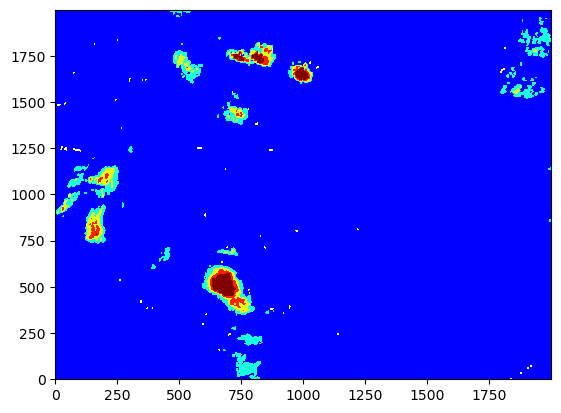

In [7]:
# plot h61_20221011_2300_01_fdk_translated_wraped_remapped-bil.nc
data = xarray.open_dataset(EXA_DIR+"/"+"h61_20221011_2300_01_fdk_translated_wraped_remapped-bil.nc")
pl.contourf(data["Band1"], cmap="jet", vmax=2)

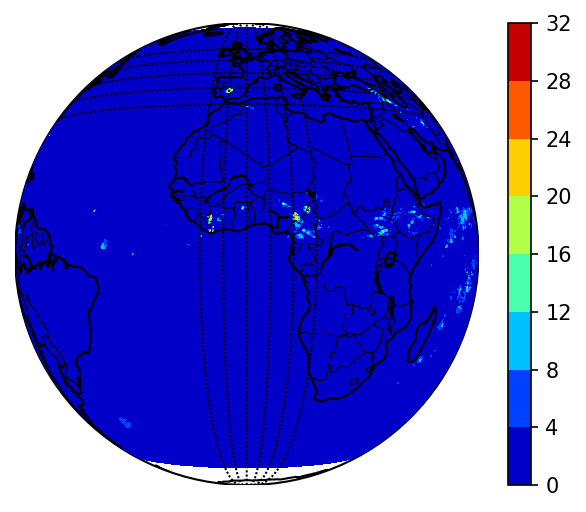

In [26]:
# plot h61_20221011_2300_01_fdk_translated_wraped.nc"

data = xarray.open_dataset(EXA_DIR+"/"+"h61_20221011_2300_01_fdk_translated_wraped.nc")
lat = data['lat']
lon = data['lon']
precip=data["Band1"]
lons, lats = np.meshgrid(lon, lat)
pl.figure(figsize=(5, 4), dpi=150)

m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)

m.drawcoastlines()
m.drawparallels(np.arange(35., 60., 5.))
m.drawmeridians(np.arange(-10., 20., 5.))
m.drawcountries()
pr=m.contourf(lons, lats, precip, latlon=True, cmap="jet")
pl.colorbar()

#### 3.2. Regrid Using `HSAF_UTI` Files


['plot_nc.m', 'lat_lon_0.nc', 'add_latlon.m', 'lat_lon_46.nc', 'plot_txt.m', 'pixcoord2geocoord.m']
five points in the middle for long:
[[9.95335986 9.92526006 9.89716412 9.86907204 9.84098379]
 [9.95236205 9.92426517 9.89617216 9.868083   9.83999767]
 [9.95136734 9.92327338 9.89518328 9.86709703 9.83901462]
 [9.95037572 9.92228466 9.89419747 9.86611413 9.83803462]
 [9.94938719 9.92129903 9.89321474 9.86513429 9.83705767]]
five points in the middle for lat:
[[-9.87629511 -9.87612158 -9.87594856 -9.87577605 -9.87560404]
 [-9.8484244  -9.84825139 -9.84807889 -9.84790689 -9.84773539]
 [-9.82055742 -9.82038493 -9.82021295 -9.82004146 -9.81987048]
 [-9.79269417 -9.7925222  -9.79235073 -9.79217976 -9.7920093 ]
 [-9.76483462 -9.76466317 -9.76449222 -9.76432177 -9.76415182]]


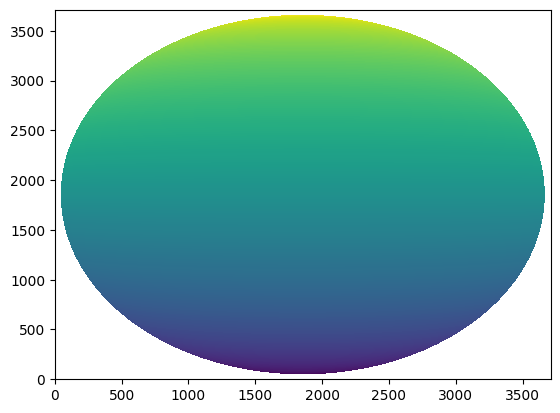

In [157]:
#read "lat_lon_0.nc"
files=os.listdir(HSAF_UTI)
print(files)
data = xarray.open_dataset(HSAF_UTI+"/"+"lat_lon_0.nc")
print("five points in the middle for long:")
print(data['long'].values[1495:1500, 1495:1500])
print("five points in the middle for lat:")
print(data['latg'].values[1495:1500, 1495:1500])

pl.pcolormesh(data["latg"])

['plot_nc.m', 'lat_lon_0.nc', 'add_latlon.m', 'lat_lon_46.nc', 'plot_txt.m', 'pixcoord2geocoord.m']
five points in the middle for long:
[[55.45335986 55.42526006 55.39716412 55.36907204 55.34098379]
 [55.45236205 55.42426517 55.39617216 55.368083   55.33999767]
 [55.45136734 55.42327338 55.39518328 55.36709703 55.33901462]
 [55.45037572 55.42228466 55.39419747 55.36611413 55.33803462]
 [55.44938719 55.42129903 55.39321474 55.36513429 55.33705767]]
five points in the middle for lat:
[[-9.87629511 -9.87612158 -9.87594856 -9.87577605 -9.87560404]
 [-9.8484244  -9.84825139 -9.84807889 -9.84790689 -9.84773539]
 [-9.82055742 -9.82038493 -9.82021295 -9.82004146 -9.81987048]
 [-9.79269417 -9.7925222  -9.79235073 -9.79217976 -9.7920093 ]
 [-9.76483462 -9.76466317 -9.76449222 -9.76432177 -9.76415182]]


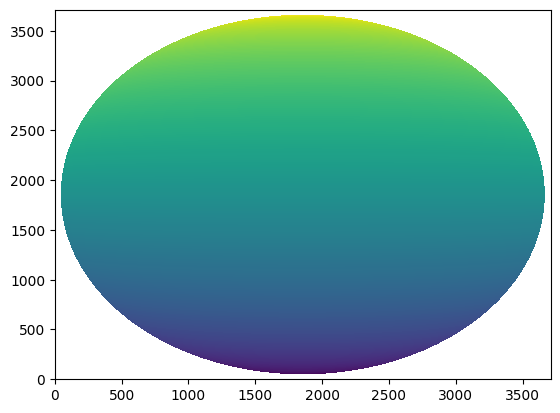

In [103]:
#read lat_lon_46.nc
files=os.listdir(HSAF_UTI)
print(files)
data = xarray.open_dataset(HSAF_UTI+"/"+"lat_lon_46.nc")
print("five points in the middle for long:")
print(data['long'].values[1495:1500, 1495:1500])
print("five points in the middle for lat:")
print(data['latg'].values[1495:1500, 1495:1500])

pl.pcolormesh(data["latg"])

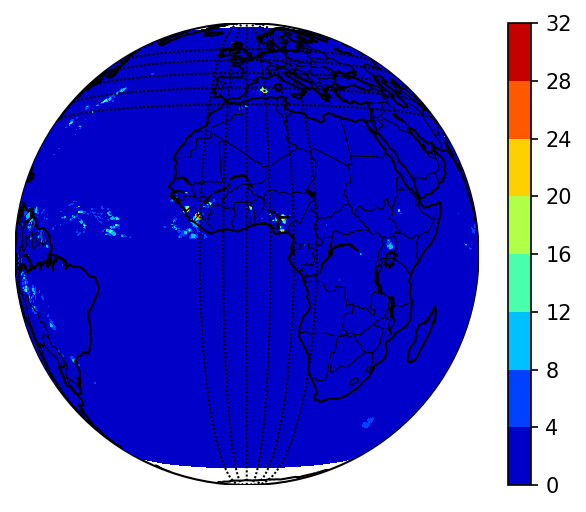

In [27]:
# plot h61_20221011_2300_01_fdk

data = xarray.open_dataset(EXA_DIR+"/"+"h61_20221011_2300_01_fdk.nc")
latlon=xarray.open_dataset(HSAF_UTI+"/"+"lat_lon_0.nc")
lat = latlon.variables['latg']
lon = latlon.variables['long']
precip=data["acc_rr"]

pl.figure(figsize=(5, 4), dpi=150)

m = Basemap(projection='geos', rsphere=(6378137.00,6356752.3142), lon_0=0., resolution='c', satellite_height=35785832)
#m = Basemap(projection='ortho', lat_0=50, lon_0=0, resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(35., 60., 5.))
m.drawmeridians(np.arange(-10., 20., 5.))
m.drawcountries()
pr=m.contourf(lon, lat, precip, latlon=True, cmap="jet")
pl.colorbar()

#### 3.3. Compare hsaf .png file with 3.1 and 3.2

In [ ]:
# download the png file from ftp server and compare it with the two data:

path = 'h61/h61_cur_mon_png/'
filename = 'h61_20221011_2300_01_fdk.png'

ftp = ftplib.FTP("ftphsaf.meteoam.it") 
ftp.login("kpatakchi@gmail.com", "acaD5Z27qnUMHqW") 
ftp.cwd(path)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
Image(filename=filename) 
#ftp.quit()
#! rm $filename
print ("HSAF_UTI matches with the PNG file")

#### 3.4. Compare various regridding methods

##### 3.4.1 Daily

In [2]:
# input: single 3d nc files; output: png files 
# Plot pr and qind in no_projection and plate Carree
from py_env_hpc import *

files=["HSAF_PP_OCT_2020_2021.cr.nc", "HSAF_PP_OCT_2020_2021.remapbil.cr.nc",
         "HSAF_PP_OCT_2020_2021.remapbic.cr.nc", "HSAF_PP_OCT_2020_2021.remapnn.cr.nc",
      "HSAF_PP_OCT_2020_2021.remapdis.cr.nc", "HSAF_PP_OCT_2020_2021.remapcon.cr.nc"]

titles=["raw", "bilinear resampling", "bicubic resampling", "nearest neighbor resampling",
       "distance weighted average remapping", "first order conservative remapping"]

variables=["pr", "qind"]
maxvals=[4, 100]

projections=["no_projection", ccrs.PlateCarree()]
proj_names=["no_projection", "Plate Carree"]

n_tsteps=200

for v in range(len(variables)):
    variable=variables[v]
    maxval=maxvals[v]
    for p in range(len(projections)):
        projection=projections[p]
        proj_name=proj_names[p]
        Func.nc_comparison_mapper (HSAF_RG, files, titles, variable,
                                   projection, proj_name, 120, 1.3, 0.7,
                                   2, 3, n_tsteps, "rainbow", 4, maxval,
                                   HSAF_PLOT+"/HSAF_"+variable+"_"+proj_name)

In [3]:
# input: png files; output: single video file 
# make animations for pr and qind
from py_env_hpc import *

ani_names=["HSAF_pr_no_projection", "HSAF_pr_Plate Carree",
           "HSAF_qind_no_projection", "HSAF_qind_Plate Carree",
           "HSAF_qind_fulldisc", "HSAF_pr_fulldisc"]

for ani_no in range(len(ani_names)):
    ani_name=ani_names[ani_no]
    png_list=sorted(os.listdir(HSAF_PLOT+"/"+ani_name))
    png_dir=HSAF_PLOT+"/"+ani_name
    ex_img=png_dir+"/"+png_list[10]
    frame_size=list(cv2.imread(ex_img).shape)
    del frame_size[2]
    frame_size.reverse()
    out=cv2.VideoWriter(HSAF_PLOT+"/VIDEOS/"+
                        ani_name+'.mp4',cv2.VideoWriter_fourcc(*'mp4v')
                        , 5, frame_size)
    for pngfile in png_list:
        img=cv2.imread(png_dir+"/"+pngfile)
        out.write(img)
    out.release()

##### 3.4.2 Monthly

In [1]:
# input: single 3d nc files; output: png files 
# Plot pr and qind in no_projection and plate Carree
from py_env_hpc import *

files=["HSAF_PP_OCT_2020_2021.cr.nc.monsum.nc", "HSAF_PP_OCT_2020_2021.remapbil.cr.nc.monsum.nc",
         "HSAF_PP_OCT_2020_2021.remapbic.cr.nc.monsum.nc", "HSAF_PP_OCT_2020_2021.remapnn.cr.nc.monsum.nc",
      "HSAF_PP_OCT_2020_2021.remapdis.cr.nc.monsum.nc", "HSAF_PP_OCT_2020_2021.remapcon.cr.nc.monsum.nc"]

titles=["raw", "bilinear resampling", "bicubic resampling", "nearest neighbor resampling",
       "distance weighted average remapping", "first order conservative remapping"]

variables=["pr", "qind"]
maxvals=[100, 100]

projections=["no_projection", ccrs.PlateCarree()]
proj_names=["no_projection", "Plate Carree"]

n_tsteps=12

for v in range(len(variables)):
    variable=variables[v]
    maxval=maxvals[v]
    for p in range(len(projections)):
        projection=projections[p]
        proj_name=proj_names[p]
        Func.nc_comparison_mapper (HSAF_RG, files, titles, variable,
                                   projection, proj_name, 120, 1.3, 0.7,
                                   2, 3, n_tsteps, "rainbow", 4, maxval,
                                   HSAF_PLOT+"/HSAF_"+variable+"_"+proj_name+"_monsum")

2022-11-21 09:50:32.272596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# input: png files; output: single video file 
# make animations for pr and qind
from py_env_hpc import *

ani_names=["HSAF_pr_no_projection_monsum", "HSAF_pr_Plate Carree_monsum",
           "HSAF_qind_no_projection_monsum", "HSAF_qind_Plate Carree_monsum"]

for ani_no in range(len(ani_names)):
    ani_name=ani_names[ani_no]
    png_list=sorted(os.listdir(HSAF_PLOT+"/"+ani_name))
    png_dir=HSAF_PLOT+"/"+ani_name
    ex_img=png_dir+"/"+png_list[10]
    frame_size=list(cv2.imread(ex_img).shape)
    del frame_size[2]
    frame_size.reverse()
    out=cv2.VideoWriter(HSAF_PLOT+"/VIDEOS/"+
                        ani_name+'.mp4',cv2.VideoWriter_fourcc(*'mp4v')
                        , 5, frame_size)
    for pngfile in png_list:
        img=cv2.imread(png_dir+"/"+pngfile)
        out.write(img)
    out.release()